In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



In [3]:
#Import the new-animals_all.csv dataset into R as a dataframe, 
#and then Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

In [4]:
new_animal <- read_csv("new-animals_all.csv")

Parsed with column specification:
cols(
  index = col_double(),
  `Common Name` = col_character(),
  `Endangered Animals of Area` = col_character(),
  `Scientific Name:` = col_character(),
  `Other Names and/or Listed subspecies:` = col_character(),
  `Group:` = col_character(),
  `Status/Date Listed as Endangered:` = col_character(),
  `Area(s) Where Listed As Endangered:` = col_character(),
  Area = col_character(),
  Status = col_character()
)


In [5]:
new_animal %>%
  glimpse()

Observations: 1,329
Variables: 10
$ index                                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…
$ `Common Name`                           <chr> "Abbott's Duiker", "Aberdare …
$ `Endangered Animals of Area`            <chr> "Endangered Mammals of Africa…
$ `Scientific Name:`                      <chr> "Cephalophus spadix", "Surdis…
$ `Other Names and/or Listed subspecies:` <chr> "Minde", "Aberdare Shrew", NA…
$ `Group:`                                <chr> "Mammals", "Mammals", "Mammal…
$ `Status/Date Listed as Endangered:`     <chr> "EN-IUCN: 2008", "VU-IUCN: 20…
$ `Area(s) Where Listed As Endangered:`   <chr> "Tanzania", "Kenya", "North A…
$ Area                                    <chr> "Africa", "Africa", "Africa",…
$ Status                                  <chr> "EN", "VU", "CR", "CR", "VU",…


In [6]:
new_animal %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 1329    
 n variables: 10    

Variable type: character

|               variable                | missing | complete |  n   | min | max | empty | n_unique |
|---------------------------------------|---------|----------|------|-----|-----|-------|----------|
|                 Area                  |    0    |   1329   | 1329 |  4  | 29  |   0   |    11    |
|  Area(s) Where Listed As Endangered:  |    0    |   1329   | 1329 |  4  | 338 |   0   |   459    |
|              Common Name              |    0    |   1329   | 1329 |  4  | 35  |   0   |   1071   |
|      Endangered Animals of Area       |    0    |   1329   | 1329 | 26  | 51  |   0   |    11    |
|                Group:                 |    0    |   1329   | 1329 |  7  |  7  |   0   |    1     |
| Other Names and/or Listed subspecies: |   578   |   751    | 1329 |  4  | 255 |   0   |   591    |
|           Scientific Name:            |    1    |   1328   | 1329 |  9  | 37  |   0   |   1070   |


In [7]:
#The variable named "Other Names and/or Listed subspecies" has lots of missing data.

In [8]:
library(magrittr)


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [9]:
# Classify Hawaii and Central America into North America, and Classify Australia into the Oceans and Island Nation.

In [10]:
new_animal[new_animal$Area == "Hawaii",]%<>% mutate(Area = "North America")
new_animal[new_animal$Area == "Central America",]%<>% mutate(Area = "North America")
new_animal[new_animal$Area == "Australia",]%<>% mutate(Area = "the Oceans and Island Nations")

 "T = threatened. ": A species likely to become endangered within the foreseeable future throughout all or a significant portion of its range.(https://www.fws.gov/endangered/about/listing-status-codes.html)
 
 "The IUCN Red List Categories define the extinction risk of species assessed. Nine categories extend from NE (Not Evaluated) to EX (Extinct). Critically Endangered (CR), Endangered (EN) and Vulnerable (VU) species are considered to be threatened with extinction. "NT :Near Threatened " "DD : Data Deficient"(https://www.iucn.org/resources/conservation-tools/iucn-red-list-threatened-species) 
 
 so "T-" can classify into "NT :Near Threatened"

In [11]:
new_animal <- new_animal %>% filter(!is.na(Status))
new_animal[new_animal$Status == "T-",] %<>% mutate(Status = "NT")

In [12]:
Status_total <- new_animal %>%
  group_by(Status, Area) %>%
  tally() %>%
  group_by(Area) %>%
  summarise(total=sum(n))

In [13]:
Status_total

Area,total
<chr>,<int>
Africa,253
Antarctica,9
Asia,333
Europe,86
North America,222
South America,206
the Middle East,67
the Oceans and Island Nations,152


In [14]:
Status_Area_count <- new_animal %>%
  group_by(Status, Area) %>%
  tally()

In [15]:
Status_Area_combine <- Status_Area_count %>%
  full_join(Status_total, by = "Area")

In [16]:
Status_Area_combine

Status,Area,n,total
<chr>,<chr>,<int>,<int>
CR,Africa,15,253
CR,Asia,27,333
CR,Europe,2,86
CR,North America,26,222
CR,South America,19,206
CR,the Middle East,1,67
CR,the Oceans and Island Nations,14,152
DD,South America,1,206
EN,Africa,131,253


In [17]:
Status_Area_combine$Status <- as_factor(Status_Area_combine$Status)
Status_Area_combine$Status %>% class

[1] "factor"

In [18]:
Status_Area_combine$Status <- factor(Status_Area_combine$Status, levels = c("NT", "DD", "VU", "EN", "CR"))

In [20]:
animal_plot <- Status_Area_combine %>%
  ggplot() +
  geom_bar(aes(x=Area, y=n/total, fill=Status),stat="identity")+
  scale_fill_brewer(palette="OrRd") +
  ggtitle("Proportion of Endangered Animal Count in each Region Status") +
  labs(y="proportion", x = "continent") +
  coord_flip()

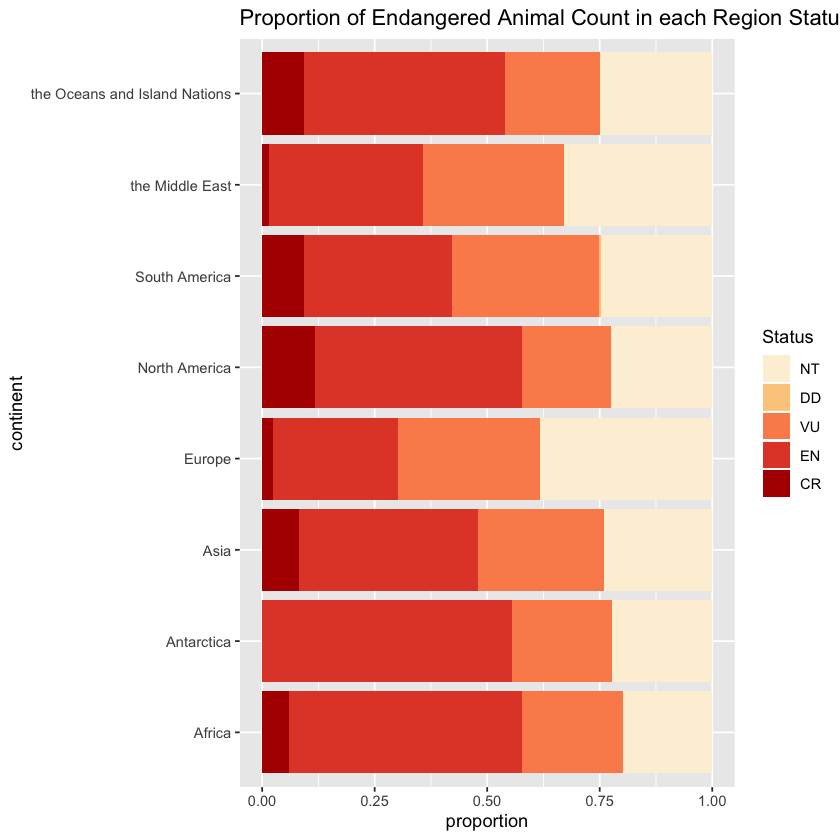

In [21]:
animal_plot

In [22]:
ggsave(animal_plot,filename = "Animal plot.pdf",width = 12,height = 9)

In [23]:
Status_total$Area <-as.factor(Status_total$Area)
Status_total <- Status_total %>%
  mutate(proportion = total/sum(total)) %>%
  arrange(desc(proportion))

In [24]:
#reorder origin by ascending count
Status_total$Area <- reorder(Status_total$Area, Status_total$proportion)

In [26]:
animal_plot2 <- Status_total %>%
  ggplot(aes(x="", y=proportion, fill=Area))+
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start=0) +
  scale_fill_brewer(palette="OrRd") +
  ggtitle("Proportion of Endangered Animal Count in each Region") +
  theme(plot.title = element_text(hjust = 0.5), axis.title.x =element_blank())

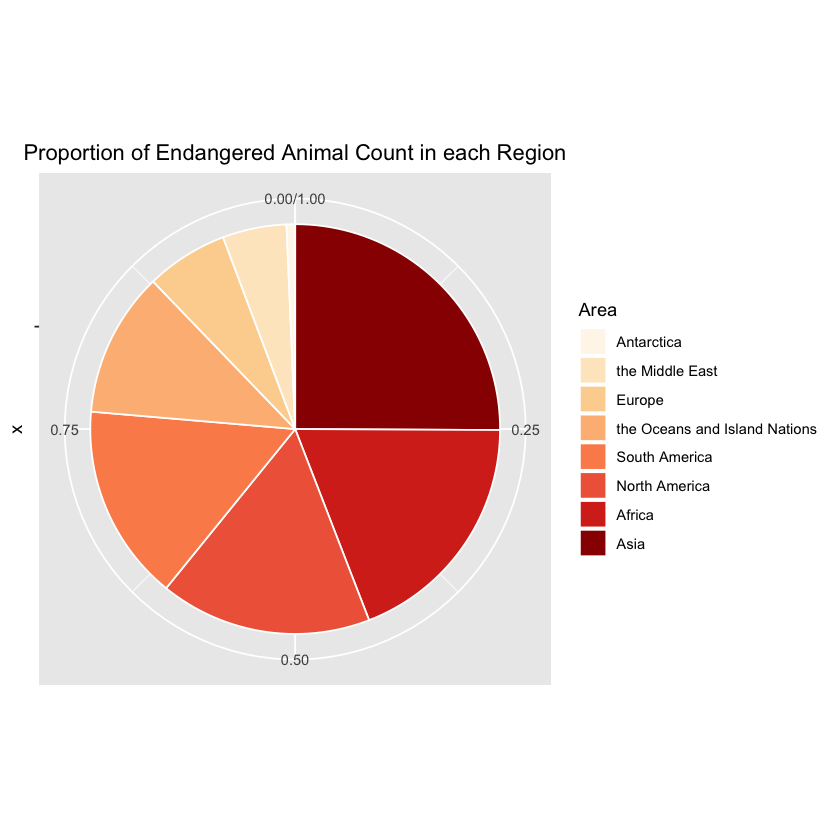

In [27]:
animal_plot2

In [28]:
ggsave(animal_plot2,filename = "Animal pie chart.pdf",width = 12,height = 9)